<a href="https://colab.research.google.com/github/Ank339/MODULE-2-project/blob/main/Airbnb_booking_Analyses_By_Ankit_Sharma05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airbnb Booking Analyses



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around **49,000 observations** in it with **16 columns** and it is a mix between categorical and numeric values.



# **GitHub Link -**

https://github.com/Ank339/MODULE-2-project/blob/main/Airbnb_booking_Analyses_By_Ankit_Sharma.ipynb

# **Problem Statement**



Airbnb hosts and the platform itself strive to optimize the hosting experience
and attract more bookings. The challenge is to analyze Airbnb booking patterns,
user preferences, and pricing strategies to uncover valuable insights. By
conducting an in-depth Exploratory Data Analysis (EDA), we aim to understand
the dynamics influencing booking trends, user behavior, and host success. The
ultimate goal is to provide actionable insights for hosts to enhance their listings
and for Airbnb to refine its platform features, ultimately fostering a deeper
understanding of the vacation rental market.


## **Define** **business** **Objective**

**Maximize Airbnb Host Success:**    
Enhance host strategies by leveraging data insights, resulting in increased
bookings and revenue on the Airbnb platform.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Mounting drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
airbnb_df = pd.read_csv('/content/drive/MyDrive/module 2/Airbnb NYC 2019.csv')

### Dataset First View

In [4]:
# First five 5 rows view of airbnb data
airbnb_df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
airbnb_df.shape

(48895, 16)

### Dataset Information

In [6]:
airbnb_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count

len(airbnb_df[airbnb_df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(airbnb_df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


<Axes: >

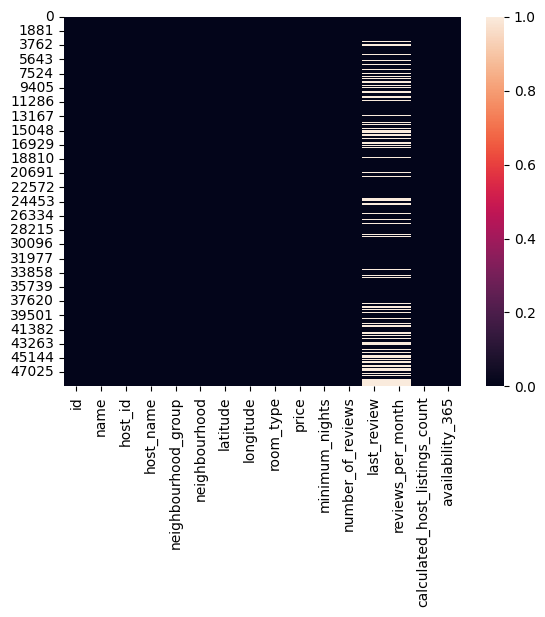

In [10]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(airbnb_df.isnull(), cbar=True)

In [11]:
# Dataset Columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [12]:
# Dataset Describe
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.

for i in airbnb_df.columns.tolist():
  print("No. of unique values in ",i,"is",airbnb_df[i].nunique(),".")

No. of unique values in  id is 48895 .
No. of unique values in  name is 47905 .
No. of unique values in  host_id is 37457 .
No. of unique values in  host_name is 11452 .
No. of unique values in  neighbourhood_group is 5 .
No. of unique values in  neighbourhood is 221 .
No. of unique values in  latitude is 19048 .
No. of unique values in  longitude is 14718 .
No. of unique values in  room_type is 3 .
No. of unique values in  price is 674 .
No. of unique values in  minimum_nights is 109 .
No. of unique values in  number_of_reviews is 394 .
No. of unique values in  last_review is 1764 .
No. of unique values in  reviews_per_month is 937 .
No. of unique values in  calculated_host_listings_count is 47 .
No. of unique values in  availability_365 is 366 .


### What did you know about your dataset?

1.The dataset has 16 columns and 48,895 rows.    
2.A significant number of values seem to be missing from the last_review and reviews_per_month columns.    
3.The rows are entirely unique meaning there is no repeated record.    
4.There are five different neighborhood groups, 221 neighborhoods, 37,457 hosts, 48,895 listings, and three types of room available for rental.


## ***2. Understanding Your Variables***

### Variables Description


* id                   -  Unique Id   
* name                 -  Name of listings    
* host_id              - Unique host_id       
* host_name            - Name of host_id       
* neighbourhood_group  - Location      
* neighbourhood        - Area     
* latitude             - Latitude Range  
* longitude            - Longitude Range   
* room_type            - Type of Listing  
* price                - Price of listing  
* minimum_nights       - Maximum nights to be paid for  
* number_of_reviews    - Number of reviews     
* last_review          - Content of the last review    
* reviews_per_month    - Number of checks per month             
* calculated_host_listings_count - Total count       
* availability_365     - Availabily around the year









## 3. ***Data Wrangling***

## Data Cleaning


In [29]:
# Creating a copy of the current dataset and assigning to df
df=airbnb_df.copy()

In [30]:
# Removing rows having zero price values from our dataset.
df = df[df['price'] !=0]

* The columns with missing values are name, host_name, last_review, and
reviews_per_month - with the last two missing over 10,000 rows of data each.  
* The number of reviews per month can be interesting to analyze, so the best way to deal with this column is to replace all NaN values with zeros, similarly host_names and names are not that important in our analysis, so atleast we are good to fill those with some substitutes in both the columns.   
* The last_review column also having plenty amount of null values, So to treat it we are replacing it with 'NaT'

In [32]:
# Since both 'name' and 'host_name' has very less missing values as compared to the
# Entire dataset we can fill these missing values in both with unknown & no_name respectively!

df['name'].fillna('unknown',inplace=True)
df['host_name'].fillna('anonymous',inplace=True)

In [33]:
df['last_review'].fillna('NaT', inplace=True) # replacing '' (blank space) values with NaT in last_review

<ipython-input-33-c7bab4f5690f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last_review'].fillna('NaT', inplace=True) # replacing '' (blank space) values with NaT in last_review


In [34]:
# Checks if any null values still exist!
df[['host_name','name']].isnull().values.any()

np.False_

In [35]:

# Filling null values in reviews_per_month column with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [36]:
# Checking for null values
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [37]:
# Converting last review column to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [38]:
# Removing Columns that are not needed for our EDA
df.drop(['id', 'latitude','longitude'],axis=1,inplace=True)
df.head(1)

,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365


### Data Wrangling Code

In [39]:
# 1. What can we learn about different hosts and areas?
hosts_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count',ascending=False).head()


,host_name,neighbourhood_group,calculated_host_listings_count
13215,Sonder (NYC),Manhattan,327
1833,Blueground,Manhattan,232
1832,Blueground,Brooklyn,232
7274,Kara,Manhattan,121
7477,Kazuya,Brooklyn,103


In [40]:
# 2.What we learn from room type and their prices according to area?
room_price_area_wise = df.groupby(['neighbourhood_group','room_type'])['price'].max().reset_index()
room_price_area_wise.sort_values(by='price', ascending=False).head(10)

,neighbourhood_group,room_type,price
3,Brooklyn,Entire home/apt,10000
6,Manhattan,Entire home/apt,10000
10,Queens,Private room,10000
7,Manhattan,Private room,9999
4,Brooklyn,Private room,7500
12,Staten Island,Entire home/apt,5000
9,Queens,Entire home/apt,2600
1,Bronx,Private room,2500
11,Queens,Shared room,1800
0,Bronx,Entire home/apt,1000


In [41]:
# 3.What can we learn from Data? (ex: locations, prices, reviews, etc)
areas_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews.sort_values(by='number_of_reviews',ascending=False)

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


In [42]:
# 4.Which hosts are the busiest?
busiest_hosts = df.groupby(['host_id','host_name','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews',ascending=False).head(10)
busiest_hosts

,host_id,host_name,room_type,number_of_reviews
24495,47621202,Dona,Private room,629
7710,4734398,Jj,Private room,607
22223,37312959,Maya,Private room,543
4593,2369681,Carol,Private room,540
19451,26432133,Danielle,Private room,510
13713,12949460,Asa,Entire home/apt,488
1976,792159,Wanda,Private room,480
5059,2680820,Linda,Private room,474
161,42273,Dani,Entire home/apt,467
18295,23591164,Angela,Private room,466


In [43]:
# 5.Hosts are charging higher price

Highest_price = df.groupby(['host_id','host_name','room_type','neighbourhood_group'])['price'].max().reset_index()
Highest_price = Highest_price.sort_values(by='price',ascending=False).head(10)
Highest_price

,host_id,host_name,room_type,neighbourhood_group,price
27931,72390391,Jelena,Entire home/apt,Manhattan,10000
8058,5143901,Erin,Entire home/apt,Brooklyn,10000
17065,20582832,Kathrine,Private room,Queens,10000
7328,4382127,Matt,Entire home/apt,Manhattan,9999
2662,1235070,Olson,Entire home/apt,Manhattan,9999
6631,3906464,Amy,Private room,Manhattan,9999
16101,18128455,Rum,Entire home/apt,Manhattan,8500
2564,1177497,Jessica,Entire home/apt,Brooklyn,8000
33437,156158778,Sally,Entire home/apt,Manhattan,7703
10118,7407743,Jack,Entire home/apt,Manhattan,7500


In [44]:
# 6. Is there any traffic difference among different areas.
traffic_areas = df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights',ascending=False).head()
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13198
4,Brooklyn,Private room,10126
3,Brooklyn,Entire home/apt,9558
7,Manhattan,Private room,7982
10,Queens,Private room,3372


In [45]:
# 7. Number of reviews according to price :

price_area = df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(10)


,price,number_of_reviews
0,10,93
1,11,113
2,12,8
3,13,9
4,15,19
5,16,43
6,18,1
7,19,76
8,20,116
9,21,35


In [46]:
# Average price per night

# Calculate the average price per night
df['average_price_per_night'] = df['price'] / df['minimum_nights']

# Calculate the overall average
average_price_per_night =df['average_price_per_night'].mean()

print(f"The average price per night is: ${average_price_per_night:.2f}")


The average price per night is: $70.19


In [47]:
# Hosts Average income per listing

# Calculate the income for each listing
df['income'] = df['price'] * df['calculated_host_listings_count']

# Calculate the average income per listing
average_income_per_listing = df['income'].sum() / len(df['income'])

print(f"The average income per listing is: ${average_income_per_listing:.2f}")

The average income per listing is: $1546.19


In [48]:
# Average number of  Minimum Nights booked per listing

# Assuming each review in number of reviews corresponts to atleast 1 night hence using number of reviews
# Calculate the average nights booked per listing
average_nights_booked = df['number_of_reviews'].mean().astype(int)

print(f"The average number of nights booked per listing is: {average_nights_booked}")


The average number of nights booked per listing is: 23


In [49]:
# Analysis whether Short-Term rentals(minimum nights <= 30) are more preferred or Long-Term-rentals(minimum nights > 30)

# Classify listings as short-term or long-term
df['rental_type'] = pd.cut(df['minimum_nights'], bins=[0, 30, float('inf')], labels=['Short-term', 'Long-term'])

# Calculate the count of short-term and long-term rentals
rental_type_counts = df['rental_type'].value_counts()

print("Count of Short-term Rentals:")
print(rental_type_counts['Short-term'])

print("Count of Long-term Rentals:")
print(rental_type_counts['Long-term'])

Count of Short-term Rentals:
48137
Count of Long-term Rentals:
747


In [50]:
# Yearly Analysis based on last review

# Convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

# Extract Year from 'last_review'
df['year'] = df['last_review'].dt.year.astype(float).astype('Int64')

# Top 3 years with the maximum booking counts for each room type
booking_counts_by_rtype_yearly = df.groupby(['room_type', 'year']).size()
top_3_years_by_room_type_max = booking_counts_by_rtype_yearly.groupby('room_type', group_keys=False).nlargest(3).reset_index(name='booking_count_yearly')
print("Top 3 years for each room type when the maximum number of bookings occurred :")
print(top_3_years_by_room_type_max)
print('-----------------------------------------------------------')

# Top 3 years with the minimum booking counts for each room type
top_3_years_by_room_type_min = booking_counts_by_rtype_yearly.groupby('room_type', group_keys=False).nsmallest(3).reset_index(name='booking_count_yearly')
print("Top 3 years for each room type when the minimum number of bookings occurred :")
print(top_3_years_by_room_type_min)
print('-----------------------------------------------------------')



Top 3 years for each room type when the maximum number of bookings occurred :
         room_type  year  booking_count_yearly
0  Entire home/apt  2019                 13266
1  Entire home/apt  2018                  3073
2  Entire home/apt  2017                  1580
3     Private room  2019                 11351
4     Private room  2018                  2841
5     Private room  2017                  1560
6      Shared room  2019                   585
7      Shared room  2018                   134
8      Shared room  2017                    64
-----------------------------------------------------------
Top 3 years for each room type when the minimum number of bookings occurred :
         room_type  year  booking_count_yearly
0  Entire home/apt  2011                     2
1  Entire home/apt  2012                    15
2  Entire home/apt  2013                    33
3     Private room  2011                     5
4     Private room  2012                    10
5     Private room  2013        

### What all manipulations have you done and insights you found?

     The following manupilations insisted those are:-    
1.We learnt about different hosts and areas    
2.We learnt from room type and their prices according to area     
3.We learnt from Data.(ex: locations, prices, reviews, etc)     
4.We learnt about the busiest hosts.     
5.Hosts charging higher prices.     
6.Traffic difference among different areas.    
7.Number of reviews according to prices.      
8.Average price per night.        
9.Average income of hosts per listing.           
10.We analysed that which rental is more preferable between short term and long term.             
11.We learnt about average minimum nights booked per listing.           
12.Yearly analyses maximum to minimum number of booking count for each room type.        

Insights found :-
1. The Sounder(NYC) has most no. of listing which is in manhattan.

2. Entire home/apt is the highest no. of room type present and they charging higher as well, in airbnb dataframe.

3. The data tells us that no. of reviews in Queen and manhattan are higher than any other hosts also the customer moving more towards the cheaper options i.e. (0 - 2000) range.

4. We got the Busiest hosts - Dona,Ji etc.

5. We got the hosts charging the higher price than anyone i.e. Jelena, Kathrine etc.

6. Traffic difference found between hosts and areas i.e Manhattan, Brooklyn & Queens has most of the traffic.

7. The customer's moving more towards the cheaper options i.e. (0 - 2000) range.

8. we found that average price per night is **$70.17**

9. Average income of hosts per listing is **$1545.84**

10. (Short term rentals v/s Long Term rentals) : Short Term Rentals(minimum nights booked <30 ) -> 48148   Long Term Rentals(minimum nights booked <30 ) -> **747**

11. Average minimum nights booked per listing is **23**

12. maximum and minimum nights booking count for each room type per year i.e
* Signicant growth in booking from 2011 to 2019.
* Top 3 Years maximum booking - 2019 highest booking followed by 2018 and 2017.
* Top 3  Most booked room type across all neighbourhood groups in overall years :
 * Manhattan - Entire Home/Apt
 * Brooklyn  - Entire Home/Apt
 * Brooklyn  - Private Room


          



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

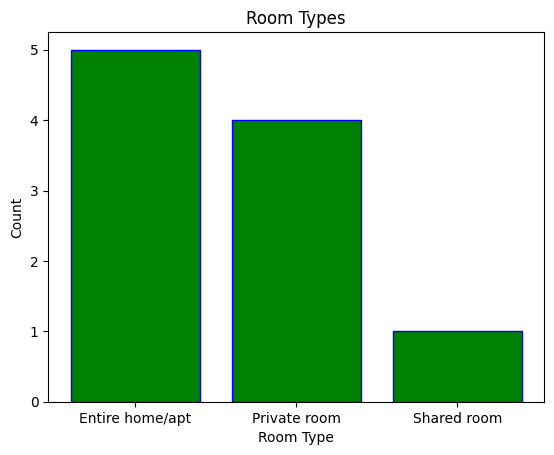

In [ ]:
# Chart - 1 To learn from room type and their prices according to area

neighbourhood_group = ['Brooklyn', 'Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Staten Island', 'Queens', 'Bronx', 'Queens', 'Bronx']
room_type = ['Entire home/apt', 'Entire home/apt', 'Private room', 'Private room', 'Private room', 'Entire home/apt', 'Entire home/apt', 'Private room', 'Shared room', 'Entire home/apt']

room_dict = {} #Create a dictionary named room_dict to store the count of each room type. Loop through the room_type list and increase the count of the room type in the dictionary if it already exists. If not, add the room type as a key with the count as 1.

for i in room_type:
    room_dict[i] = room_dict.get(i, 0) + 1

plt.bar(room_dict.keys(), room_dict.values(), color='green', edgecolor='blue') #Plot a bar graph using the plt.bar function. The x-axis will be the room types which are the keys of the room_dict dictionary and the y-axis will be the count of each room type which are the values of the room_dict dictionary.
plt.title('Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.      
 Since these are categorical variables, to analyse data from 'Bar chart' it is easy to understand like, count of which room_type is more according to hosts so, it gives us difference insights from data in an ease but interpritable

##### 2. What is/are the insight(s) found from the chart?

Answer here --> We found that **Entire home/apt** is the highest number of room types overall and prices are **high** in the **brooklyn** and **Manhattan** for entire home/apt.

##### 3. Will the gained insights help creating a positive business impact?


Answer Here - The above insight creating the **negative** impact on the business, why because in **brooklyn manhatten** and others where **Entire home/ap**t are high as the target customers who wants airbnb service affordable in the budget of customer then target audience is not collabing with airbnb,so that creating a depreciating aspect in these hosts areas.

#### Chart - 2

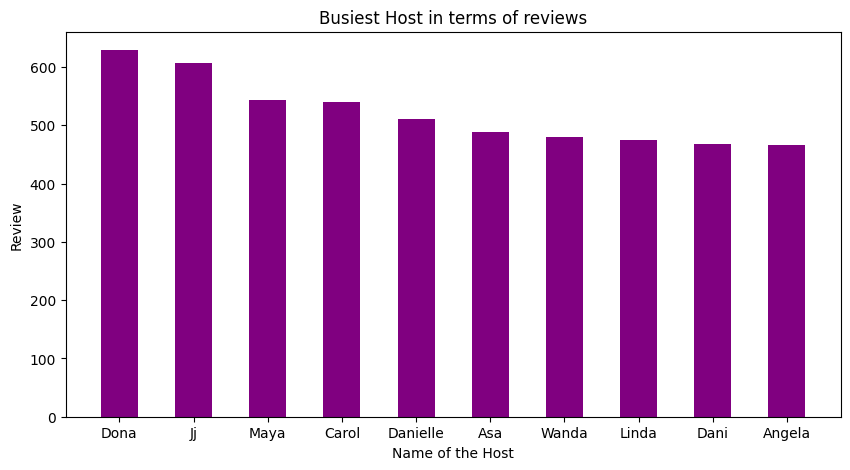

In [ ]:
# Chart - 2 Which hosts are the busiest and what is the reason?

name_hosts = busiest_hosts['host_name']
review_got = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize =(10,5))

plt.bar(name_hosts,review_got, color ='purple', width =0.5)
plt.xlabel('Name of the Host')
plt.ylabel('Review')
plt.title("Busiest Host in terms of reviews")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here. Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable.
To show the maximum no. of reviews per hosts that's why I used Bar chart

##### 2. What is/are the insight(s) found from the chart?

Answer Here - We have found Busiest hosts :
Dona,
Jj,
Maya,
Carol and
Danielle
Because these hosts listed their room type as Entire home and Private room which is preferred by most number of people and also their reviews are higher.

##### 3. Will the gained insights help creating a positive business impact?



Answer Here - Yes, above visualization can help create a positive business impact:

1.**Identify target audience**: By knowing that most people prefer entire homes and private rooms, businesses can target their marketing efforts towards those types of listings.   
2.**Improve reviews**: The insights show that reviews are important for success. Businesses can focus on improving their reviews by providing excellent customer service and amenities.    
3.**Increase bookings**: By understanding the preferences of their target audience and improving their reviews, businesses can increase their chances of getting bookings.   
4.**Optimize pricing**: The insights can also be used to optimize pricing. Businesses can see what other hosts are charging for similar listings and adjust their prices accordingly.     
**Make data-driven decisions**: The insights gained from the data can be used to make data-driven decisions about all aspects of the business, from marketing to operations.
By taking action on the insights gained from the data, businesses can improve their performance and achieve a positive business impact.

#### Chart - 3

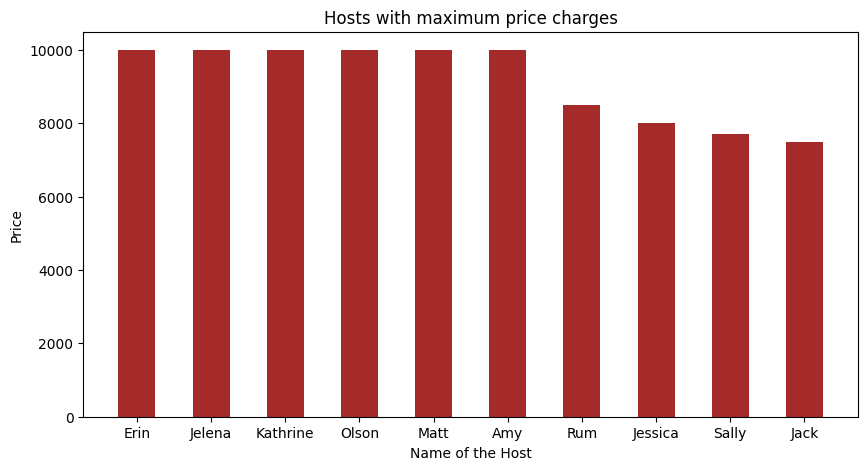

In [ ]:
# Chart - 3 Hosts are charging higher price.

name_of_host = Highest_price['host_name']
price_charge = Highest_price['price']

fig = plt.figure(figsize =(10,5))

plt.bar(name_of_host,price_charge, color ='brown', width =0.5)
plt.xlabel('Name of the Host')
plt.ylabel('Price')
plt.title("Hosts with maximum price charges")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here. To show maximum price per host more interpretable that's why I used Bar plot

##### 2. What is/are the insight(s) found from the chart?

Answer Here - Now we have found that **10 Hosts** who are charging **maximum price:**
Jelena, Kathrine, Erin, Matt, Olson, Amy, Rum, Jessica, Sally, Jack

Max Price is **10000 USD**

##### 3. Will the gained insights help creating a positive business impact?



Answer Here - Yes, the gained insights can help create a positive business impact:

**Identify high-value customers**:
 These hosts are likely to be experienced and reliable, attracting guests willing to pay a premium.
Understanding their qualities can help attract and retain similar high-value hosts.    
**Optimize pricing strategy**: Knowing the maximum price guests are willing to pay can inform pricing strategies.
Hosts can adjust their prices to maximize revenue while maintaining competitiveness.         
**Improve service quality**: Studying the qualities of these high-value hosts can reveal best practices.
Other hosts can learn from them to improve their own service quality and potentially increase their prices.   
**Targeted marketing**:These hosts may have a specific target audience or marketing strategy.
Understanding their approach can help develop more effective marketing campaigns.    
**Positive reputation**:   High-value hosts can contribute to the platform's reputation for quality and reliability.
This can attract more guests and hosts, leading to overall business growth.

#### Chart - 4

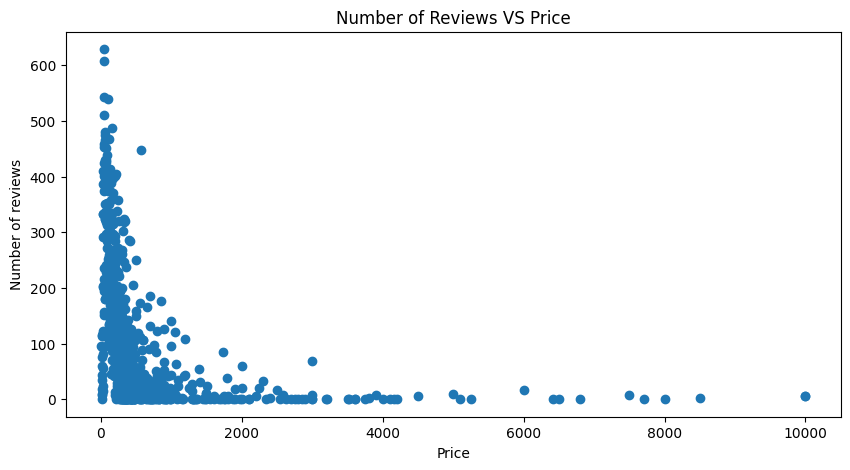

In [ ]:
# Chart - 4  Number of Reviews VS Price

price_list = price_area['price']
review = price_area['number_of_reviews']
fig =plt.figure(figsize =(10,5))

plt.scatter(price_list, review)
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.title('Number of Reviews VS Price')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here - Answer Here - A **scatter plot** uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an **individual data point**. Scatter plots are used to observe relationships between variables.

Thus, I have used the scatter plot to depict the relationship between **No. of Reviews** given by customer and the **price** they prefer to pay

##### 2. What is/are the insight(s) found from the chart?

From the above visualization we found that there are most of the customer likely to stay where the **prices** are **less** ,means **under 2000** there are **most** number of reviews than any other places, reviews are higher there.

##### 3. Will the gained insights help creating a positive business impact?


Answer Here - Yes, the above gained insights can help create a positive business impact:

**Set competitive pricing**: Businesses can use the data to set competitive pricing for their services. By offering prices that are lower than or comparable to the competition, businesses can attract more customers.    
**Improve customer experience:** The data shows that customers are more likely to leave reviews for places where they have had a positive experience. Businesses can use this information to identify areas where they can improve the customer experience, such as providing better customer service or offering more amenities.     
**Increase brand awareness:** The data shows that Airbnb booking analyses have a higher number of reviews than any other place. Businesses can use this information to increase brand awareness by promoting their positive reviews on social media and other online platforms.

#### Chart - 5

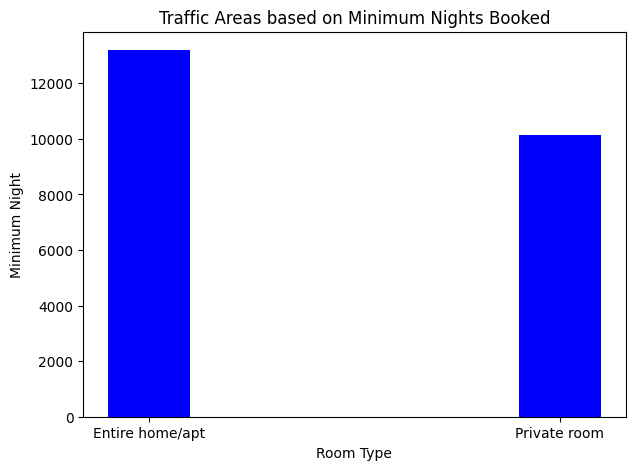

In [ ]:
# Chart - 5 Is there any traffic difference among different areas and what could be the reason for it.

areas_Traffic = traffic_areas['room_type']
room_stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize =(7,5))

plt.bar(areas_Traffic,room_stayed, color ="blue", width = 0.2)

plt.xlabel("Room Type")
plt.ylabel("Minimum Night")
plt.title("Traffic Areas based on Minimum Nights Booked")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here - The bar graph is used to compare the items between different groups over time. Bar graphs are used to measure the changes over a period of time. When the changes are larger, a bar graph is the best option to represent the data.

Thus, I have used the bar plot to show the room types where no. of minimum booking nights are increasing

##### 2. What is/are the insight(s) found from the chart?

Answer Here - From this visualization We found that most of the people likely to stay at **Entire home and Private room** but more like Entire home/apt which are present in **Manhattan, Brooklyn & Queens** there traffic is much more higher and also vistors referring stay in room which **listing price** is **less**.

##### 3. Will the gained insights help creating a positive business impact?

Answer Here - Yes the above insight can create a great positive impact impact on the business    
**Identify audience**: People looking for places to stay in Manhattan, Brooklyn, and Queens who are on a budget.     
**Highlighting the benefits of staying in an entire home/apt**: More space, privacy, and amenities.     
**Offer competitive pricing**: Price your listings lower than similar properties in the same area.    
**Promote your listings in areas with high traffic**: Advertise your listings on websites and social media platforms that are popular with people looking for places to stay in areas like Manhattan, Brooklyn, and Queens.      
**Provide excellent customer service**: Respond quickly to inquiries and requests, and make sure your guests have a positive experience.


#### Chart - 6 -Average Price Trend Over Years by Room Type (Bivariate)

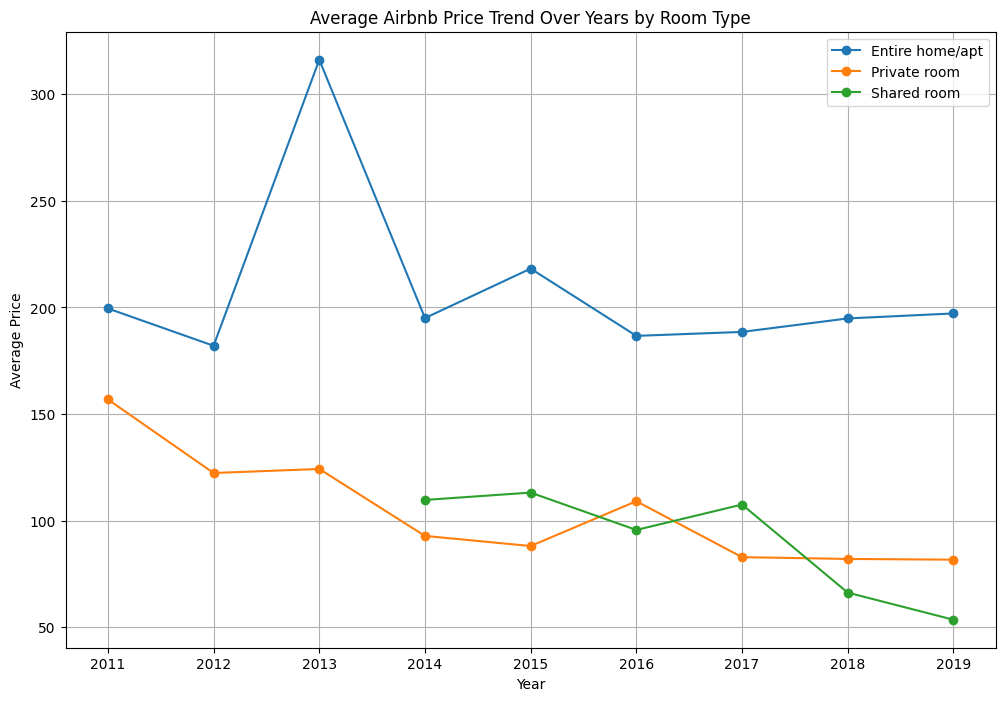

In [ ]:
# Extract Year from 'last_review'
df['year'] = df['last_review'].dt.year.astype(float).astype('Int64')

# Group by year and room type, calculate the average price
average_price_by_year_room_type = df.groupby(['year', 'room_type'])['price'].mean().unstack()

# Plot the trend for each room type over years
plt.figure(figsize=(12, 8))
for room_type in average_price_by_year_room_type.columns:
    plt.plot(average_price_by_year_room_type.index, average_price_by_year_room_type[room_type], marker='o', label=room_type)

plt.title('Average Airbnb Price Trend Over Years by Room Type')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)

plt.show()


##### 1. Why did you pick the specific chart?

I selected the Line plot to visually analyze how the average prices of different room types have evolved annually. This specific chart format, with separate lines for each room type, facilitates a clear comparison of price trends over time.

##### 2. What is/are the insight(s) found from the chart?

Entire Home/Apartment:

Prices for entire homes/apartments exhibit fluctuations, with a significant spike in 2013 and slight variations in subsequent years.This suggests that potential external factors are influencing prices, and it may be beneficial to investigate the reasons behind the 2013 spike.

Private Room:

Private room prices got peaked in 2011 and 2013, followed by a consistent decrease over the years. This drop in prices might be because people's preferences changed, or more competition came in. Another possibility is that lowering prices is a strategy to get more customers, as guests often prefer lower-priced listings.

Shared Room:

Shared room prices started in 2014 and have generally decreased since then. This could be because of changes in how the market works or because more people prefer private spaces over shared ones.

##### 3. Will the gained insights help create a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reasons.

Yes , Understanding the fluctuations in prices for each room type enables businesses to make strategic adjustments, potentially attracting more customers and making a positive business impact.
Adapting pricing strategies based on customer demand trends can positively impact customer satisfaction.
Negative Growth Consideration:

A consistent decrease in prices for certain room types may pose challenges in maintaining profitability.
Lowering prices without careful thought can result in losses, so making informed and calculated decisions is essential before reaching any conclusions.
The spikes in 2013 for both entire home/apartment and private room categories warrant investigation. If these spikes are not due to increased demand or special events, it suggests that the pricing strategies at that time might have been different or influenced by certain factors. Understanding what strategies were in place during that period, and whether they contributed to the spikes, can provide valuable insights for improving current pricing strategies. It's an opportunity to learn from past experiences and make informed adjustments to enhance business performance.

#### Chart - 7 - Average Price Trends in Different Neighbourhood Groups (Bivariate)

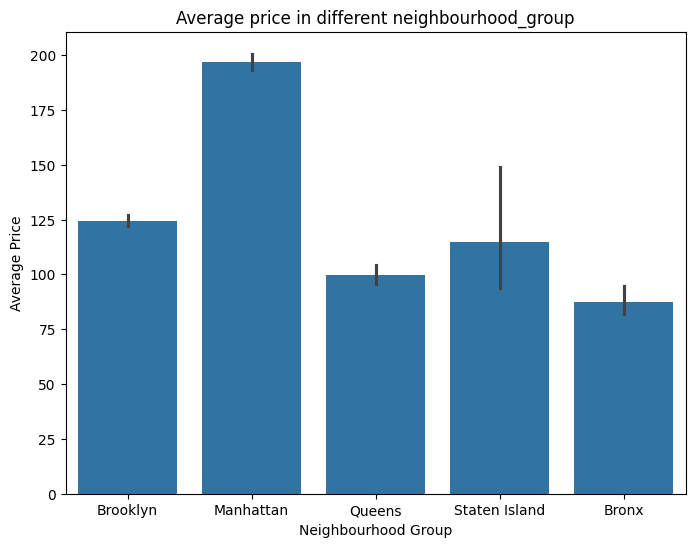

In [ ]:
# Create the bar plot for Neighbourhood group vs price
plt.figure(figsize=(8, 6))
sns.barplot(x='neighbourhood_group', y='price', data=df)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average price in different neighbourhood_group')

plt.show()

##### 1. Why did you pick the specific chart?

The bar plot was chosen because it effectively visualizes and compares the average prices across different neighborhood groups. The x-axis represents the neighborhood groups, the y-axis represents the average price, and the bars provide a clear and straightforward way to compare pricing levels.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Manhattan has the most expensive prices, and Brooklyn is next, followed by Queens, Staten Island, and the Bronx. Even though Manhattan keeps prices high, it attracts a lot of hosts and guests. This suggests that both Manhattan and Brooklyn are really popular among guests and hosts. Knowing this helps hosts decide how to set their prices in different areas.

##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with a specific reason.

Yes, the insights can positively impact business decisions. Hosts can use this information to set competitive and strategic prices for their listings based on the neighborhood. Understanding the pricing dynamics can attract guests looking for specific locations and help optimize revenue.

Negative Growth Consideration: There isn't a direct negative impact from the insights provided. However, if hosts in less expensive neighborhoods set their prices unrealistically high, it may lead to decreased bookings and potential negative growth. Setting prices too high without considering the overall market dynamics may impact occupancy rates and guest satisfaction negatively.

#### Chart - 8: Average Price by Room Type (Bivariate)

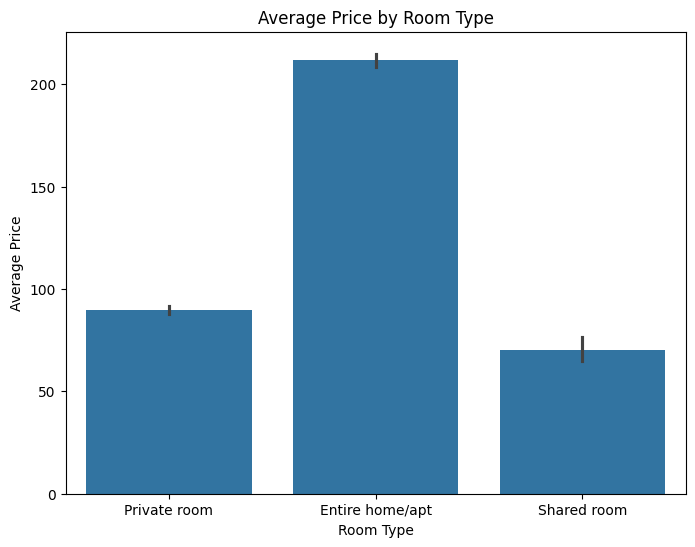

In [ ]:
# Calculate the average price for each room type
average_prices = df.groupby('neighbourhood_group')['price'].mean().reset_index()

# Create the bar plot for average price
plt.figure(figsize=(8, 6))  # Creating a new figure
sns.barplot(x='room_type', y='price', data=df)
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')

plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar plot because it is effective for comparing the average prices of different room types. The bars provide a clear visual representation, allowing for an easy comparison between the room types.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that "Entire home" listings have the highest average prices, followed by "Private room," and "Shared room" has the lowest average price. This hierarchy provides a straightforward understanding of the relative pricing levels among different room types.

##### 3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can positively impact business decisions. Hosts can use this information to strategically set prices based on room types. Knowing that "Entire home" listings command higher prices, hosts can tailor their marketing strategies to attract guests seeking premium accommodations.It allows hosts to align their pricing with guest expectations and potentially increase revenue from each room type.

#### Chart - 9 - Relationship Between Prices and Last Review Year(Bivariate)

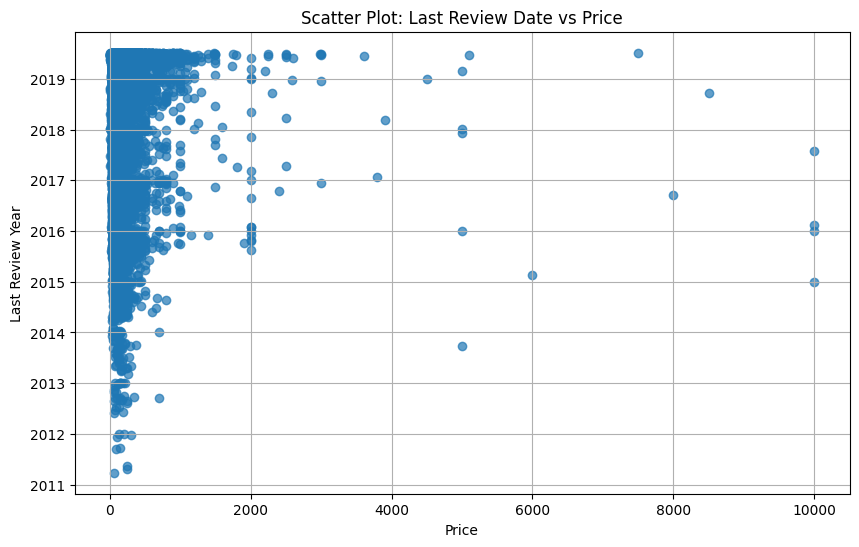

In [ ]:
# Converting last review column to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['last_review'], alpha=0.7)
plt.title('Scatter Plot: Last Review Date vs Price')
plt.xlabel('Price')
plt.ylabel('Last Review Year')
plt.grid(True)

plt.show()

##### 1. Why did you pick the specific chart?

I chose scatter plot to visually examine the relationship between the pricing of listings and the Last Review year .This allows me to understand whether an increase in prices results in more or less last reviews ,where last review serving as an indicator for booking activity , over the period from 2011 to 2019.

##### 2. What is/are the insight(s) found from the chart?

Increasing Last Review Activity:

The chart reveals a significant increase in the number of last reviews over the years. It implies that the business has experienced a notable growth in review activity, indicating increased customer engagement and bookings.
Concentration in Lower Price Range:

The tremendous rate of last review growth is particularly pronounced for lower-priced listings.
It implies that the Lower-priced listings are not only attracting more reviews, but the rate of growth is exceptional, suggesting a strong correlation between affordability and customer engagement.

##### 3. Will the gained insights help creating a positive business impact?

**Positive Impact:**

Enhanced Reputation: The increase in last review activity is generally positive, contributing to an enhanced online reputation for the business.
Customer Trust and Bookings: A growing number of reviews, especially for lower-priced listings, can build trust and attract more bookings, positively impacting the business.
Negative Growth Consideration:

**Potential Challenges with Overcrowding:**                                  The exceptional rate of growth in last reviews, particularly for lower-priced listings, may pose challenges related to managing high demand, potential overcrowding, or increased competition in the lower price range.
Quality Management: As review activity grows, maintaining the quality of customer experiences becomes crucial. Addressing negative feedback promptly is essential to avoid negative impacts on business growth.

#### Chart - 10 - 365 Days Available Room Type Across All Neighborhood Groups (Bivariate)

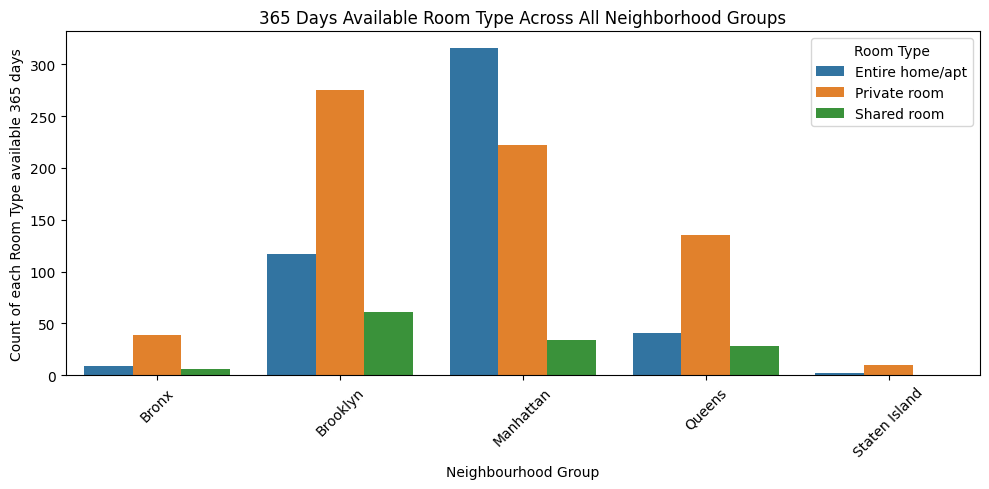

In [ ]:
# Filter the DataFrame to include only rows where availability_365 is equal to 365
availability_365_365 = df[df['availability_365'] == 365]

# Group by both 'neighbourhood_group' and 'room_type' to count occurrences
grouped_data = availability_365_365.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='count')

#  Countplot to visualize the 365-day availability of *each Room type count across all Neighborhood Groups by counting its occurance in dataframe
plt.figure(figsize=(10, 5))
sns.barplot(data=grouped_data, x='neighbourhood_group', y='count', hue='room_type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count of each Room Type available 365 days')
plt.title('365 Days Available Room Type Across All Neighborhood Groups')
plt.legend(title='Room Type')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


##### 1. Why did you pick the specific chart?

I picked a grouped bar chart (countplot) because it effectively visualizes the count of each room type available for 365 days across different neighborhood groups. This type of chart allows us to compare the distribution of room types within each neighborhood group.

##### 2. What is/are the insight(s) found from the chart?

Room Type Availability Distribution:

* The chart provides a clear visual representation of the count of each room type available for 365 days in different neighborhood groups.

* Manhattan has the highest count for all room types, indicating that properties in Manhattan are more frequently available for booking throughout the year.

Neighborhood Group Comparison:

* Among the neighborhood groups, Manhattan has the highest count, followed by Brooklyn, Queens, Bronx, and Staten Island. This suggests that Manhattan has a larger number of properties available for booking for the entire year compared to other neighborhood groups. Room Type Comparison:

* The chart also shows the distribution of room types within each neighborhood group. For example, it reveals whether entire homes/apartments, private rooms, or shared rooms are more commonly available for 365 days.

##### 3. Will the gained insights help creating a positive business impact?

* The insights can help property owners and Airbnb hosts make informed decisions about pricing strategies, marketing efforts, and property management based on the demand for different room types in each neighborhood group.
* Understanding the popularity of room types in specific areas can guide hosts in optimizing their listings for maximum occupancy and revenue.
Negative Growth Consideration:

* Hosts in areas with consistently low availability for 365 days should critically evaluate their market position. If demand is low, adjusting pricing strategies to become more competitive might be beneficial. Additionally, offering different types of accommodations could help attract a wider audience.

* The goal is to make the property more appealing to potential guests and improve the overall occupancy rate, ultimately contributing to a more successful hosting experience.

#### Chart - 11 - Correlation Heatmap

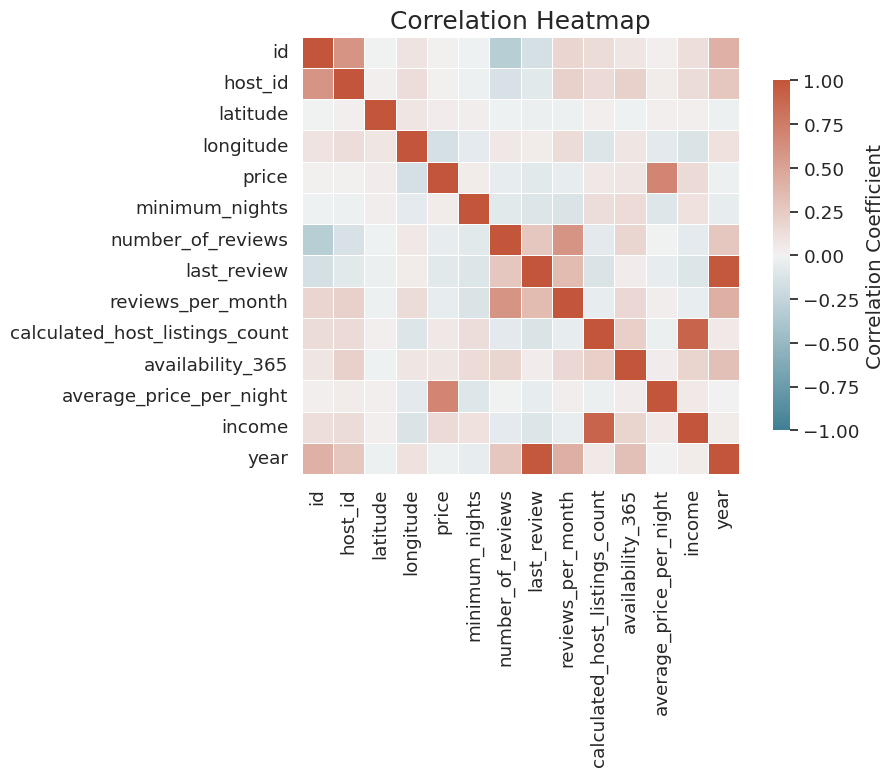

In [ ]:
# Correlation Heatmap visualization code -

corr = df[df.describe().columns].corr()
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Increasing font size for readability

# Defining custom color palette with more contrast
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Drawing the heatmap with improved annotation and aesthetics
sns.heatmap(corr, cmap=cmap, annot=False, fmt=".2f", annot_kws={"size": 12, "weight": "bold"},
            linewidths=0.5, cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            square=True, linecolor='white', vmin=-1, vmax=1)

# Adding title
plt.title('Correlation Heatmap', fontsize=18)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Showing plot
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here - A **correlation matrix** is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

Thus to know the correlation between all the variables along with the **correlation coeficients**, So that's why I used **correlation heatmap**.

##### 2. What is/are the insight(s) found from the chart?

Answer Here -  Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.      
The correlation heatmap says it all that is expresses the relationship between the variables like **id** - **host_id** are slightly more correlated to each other than any of the variable

#### Chart - 12 - Pair Plot

In [ ]:
# Pair Plot visualization code -

sns.pairplot(df, hue = 'room_type')

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Answer Here -
From the above chart I got to know that there are people who likely to have more space like Entire room/ apt,private rooms and also they want cheaper price options ,So it is obvious that the lacing part is our categories where we need some changes in the prices strategy , after market strategy i.e. get reviews from the customer as well as the recognition that the other options(room_types) needs, we have to target that also, and lastly the major thing that is we need to expand the coverage of "Airbnb" , we need collaborate with more and more partners to solve the problem of traffic

#### Chart- 13 - Room types in overall airbnb dataset

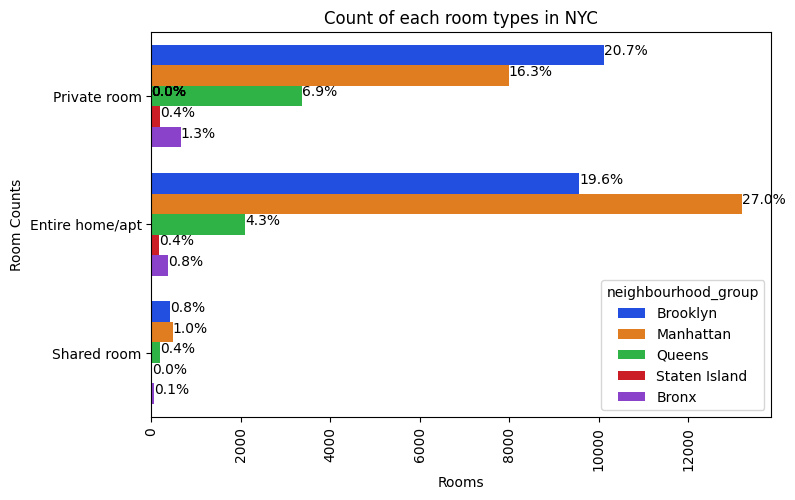

In [51]:

plt.rcParams['figure.figsize'] = (8, 5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=df,palette='bright')

total = len(df['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('Count of each room types in NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()


### Insights Found       
 Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%.
Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens.
We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

**Business Objective :-**   

### 1. Focus on popular areas and room types:

Target hosts in Manhattan, Brooklyn, and Queens, as these areas have the most traffic.
Encourage hosts to list entire homes/apartments, as this is the most popular room type and commands higher prices.
### 2. Offer competitive pricing:

Analyze the pricing strategies of successful hosts, such as Jelena and Kathrine.
Encourage hosts to price their listings competitively, especially if they are located in popular areas or offering desirable room types.
### 3. Improve customer experience:

Encourage hosts to improve their customer service and hospitality to increase the number of positive reviews.
Offer incentives to hosts who consistently receive high ratings.
### 4. Target budget-conscious customers:

Promote the platform to budget-conscious customers by highlighting the availability of affordable listings.
Offer discounts or promotions to attract new customers and encourage repeat bookings.
### 5. Personalize the experience:

Offer personalized recommendations to customers based on their previous searches and bookings.
### 6. Manage the Traffic:

The traffic should be managed because its the better time to expand the business by collaborating more and more hosts in the busiest areas that will generate more and more revenue to airbnb.

# **Conclusion**

* We find that Host name Sonder(NYC) has listed highest number of listings in Manhattan followed by Blueground.

* We found that Entire home/apt is the highest number of room types overall and prices are high in the brooklyn and Manhattan for entire home/apt.

* Guests consistently show a preference for lower-priced listings, with a
gradual increase in the volume of guests in these listings from 2011 to
2019, emphasizing the strategic importance of pricing for hosts.

* We have found Busiest hosts : Dona, Ji, Maya,Carol,Danielle
Because these hosts listed their room type as Entire home and Private room which is preferred by most number of people and also their reviews are higher.

* The noticeable spike in 2013 prompts an investigation to uncover the
reasons behind this anomaly, providing insights into external factors that
may have influenced pricing during that period. Understanding the
dynamics behind the price spike can offer valuable information for
making informed decisions in future pricing strategies.

* Over the years from 2011 to 2019, there is a general decrease in average
prices, prompting the need for hosts to understand season trends,
customer preferences, and the importance of providing excellent services
that justify prices. This strategic approach not only enhances guest
satisfaction but also contributes to increased revenue.

* Beyond the popularity of specific neighbourhoods, the conclusion
underscores the importance of understanding seasonality, providing
offers, and ensuring excellent services to stand out in the competitive
market.



### ***THANK YOU***